<a href="https://colab.research.google.com/github/Novita20/Kuis2_Machine-Learning/blob/main/TI-3F_23_Novita%20Dwi%20Rahmadani_Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KUIS 2 MECHINE LEARNING**


**Nama        : Novita Dwi Rahmadani**

**Kelas       : TI-3F**

**NIM         : 2141720050**


### Import Library

In [20]:
# Import library TensorFlow untuk machine learning
import tensorflow as tf
# Import library NumPy untuk manipulasi data numerik
import numpy as np
# Import library Pandas untuk manipulasi data tabular
import pandas as pd
# Import library Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# Import library Seaborn untuk visualisasi data statistik
import seaborn as sns
# Import class LabelBinarizer dari library scikit-learn untuk konversi label kategori ke one-hot encoding
from sklearn.preprocessing import LabelBinarizer
# Import fungsi train_test_split dari library scikit-learn untuk pembagian data menjadi data latih dan uji
from sklearn.model_selection import train_test_split
# Import fungsi classification_report dari library scikit-learn untuk evaluasi performa model
from sklearn.metrics import classification_report
# Import modul zipfile untuk menangani file arsip zip
import zipfile

# Load Dataset

## Load MNIST

In [21]:
from tensorflow.keras.datasets import mnist #mengimpor dataset MNIST dari submodul datasets yang terdapat di dalam pustaka TensorFlow

In [22]:
# Memuat data latih dan uji dari dataset MNIST menggunakan fungsi load_data()
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# Variabel train_data berisi gambar-gambar digit untuk pelatihan model
# Variabel train_labels berisi label-label yang sesuai dengan gambar-gambar digit pada data latih
# Variabel test_data berisi gambar-gambar digit untuk pengujian model
# Variabel test_labels berisi label-label yang sesuai dengan gambar-gambar digit pada data uji


11490434/11490434 [==============================] - 0s 0us/step


In [23]:
# Check shape data
(train_data.shape, test_data.shape) ## Memeriksa dimensi (shape) data latih dan data uji

((60000, 28, 28), (10000, 28, 28))

In [24]:
# cek label
# Memeriksa dan menampilkan bentuk (shape) dari data label latih dan uji
# `train_labels.shape` mengembalikan bentuk data label latih
# `test_labels.shape` mengembalikan bentuk data label uji
(train_labels.shape, test_labels.shape)


((60000,), (10000,))

In [25]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [26]:
# Check the label
train_labels.shape # Memeriksa dimensi atau bentuk array train_labels

(60000,)

### Combine Train and Test Data

In [27]:
# Menggabungkan data latih dan uji secara vertikal menggunakan np.vstack
digits_data = np.vstack([train_data, test_data])
# Menggabungkan label latih dan uji secara horizontal menggunakan np.hstack
digits_labels = np.hstack([train_labels, test_labels])


In [28]:
# Check data shape
digits_data.shape ## Memeriksa bentuk (shape) dari data "digits_data"

(70000, 28, 28)

In [29]:
# Check label shape
digits_labels.shape ## Memeriksa bentuk (shape) dari variabel 'digits_labels'

(70000,)

Text(0.5, 1.0, 'Class: 1')

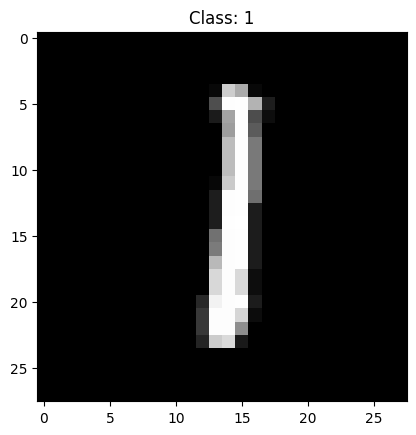

In [30]:
# Memilih indeks acak dari data digits
idx = np.random.randint(0, digits_data.shape[0])
# Menampilkan gambar dengan skala warna abu-abu
plt.imshow(digits_data[idx], cmap='gray')
# Menambahkan judul berisi kelas dari gambar yang dipilih
plt.title('Class: ' + str(digits_labels[idx]))


<Axes: xlabel='Labels', ylabel='count'>

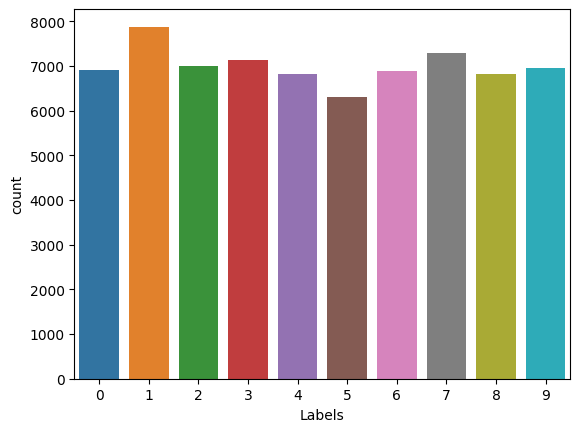

In [31]:
# Buat DataFrame baru untuk label dari data
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
# Visualisasikan distribusi data menggunakan countplot dari Seaborn
sns.countplot(df_labels, x='Labels')


## Load Kaggle A-Z

In [32]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 13:03:53--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.1’

alfabeto_A-Z.zip.1  100%[===================>] 184.67M   208MB/s    in 0.9s    

2023-12-05 13:03:54 (208 MB/s) - ‘alfabeto_A-Z.zip.1’ saved [193643888/193643888]



In [33]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [34]:
# Membaca dataset dari file CSV 'A_Z Handwritten Data.csv' dan mengonversi tipe data menjadi float32
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
# Menampilkan dataset
dataset_az


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Mendapatkan data piksel dari dataset tanpa kolom '0'
alphabet_data = dataset_az.drop('0', axis=1)
# Mendapatkan label dari dataset hanya pada kolom '0'
alphabet_labels = dataset_az['0']


In [36]:
# Memeriksa dimensi data (bentuk atau shape) dari variabel alphabet_data dan alphabet_labels
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [37]:
# Memeriksa bentuk (shape) dari variabel 'alphabet_labels'
alphabet_labels.shape


(372450,)

In [38]:

# Melakukan reshape data piksel menjadi matriks 28x28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Memeriksa hasil reshape dengan melihat dimensinya
alphabet_data.shape


(372450, 28, 28)

Text(0.5, 1.0, 'Class: 22.0')

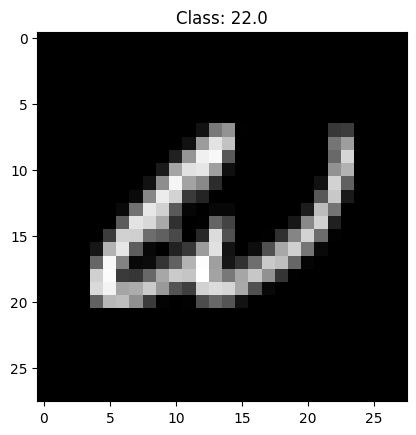

In [39]:
# Memilih indeks acak dari dataset A-Z
index = np.random.randint(0, alphabet_data.shape[0])
# Menampilkan gambar dari dataset dengan skala abu-abu
plt.imshow(alphabet_data[index], cmap='gray')
# Menambahkan judul gambar dengan label kelas yang sesuai
plt.title('Class: ' + str(alphabet_labels[index]))


<Axes: xlabel='Labels', ylabel='count'>

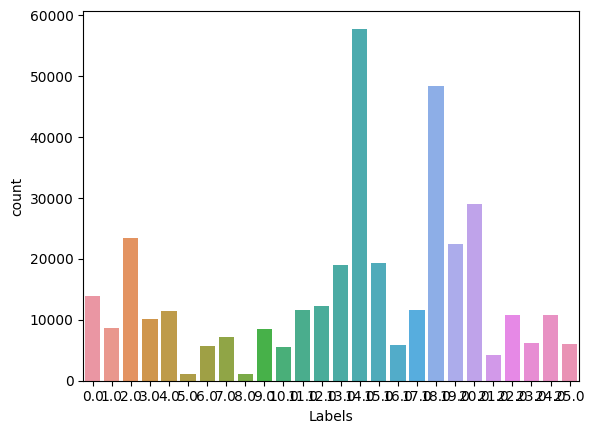

In [40]:
# Membuat DataFrame baru untuk menampung label abjad
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
# Menampilkan distribusi label menggunakan countplot dari Seaborn
sns.countplot(df_az_labels, x='Labels')


## Combine Dataset (MNIST + Kaggel A-Z)

In [42]:
# Misalkan Anda memiliki variabel 'labels' sebagai pengganti 'digits_labels'
np.unique(digits_labels)

#Menggunakan NumPy, perintah ini digunakan untuk mengecek nilai unik yang terdapat
#dalam array 'digits_labels'. Fungsi np.unique() mengembalikan nilai-nilai unik yang ada dalam array tersebut.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [44]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [45]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [46]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [47]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [48]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [49]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [50]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [51]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [52]:
# Normalize data
data /= 255.0

In [53]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [54]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [55]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

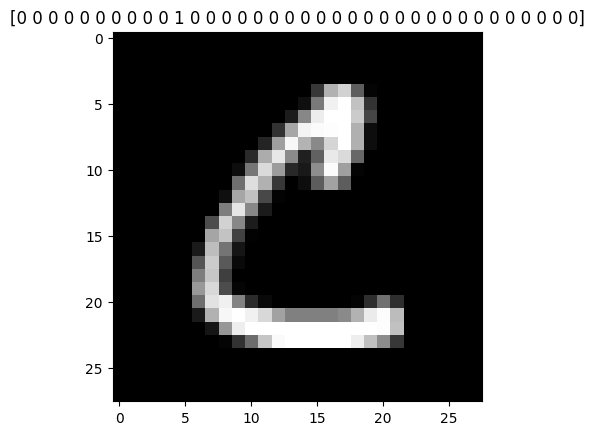

In [56]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [57]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [58]:
# Check the biggest value of data
classes_total.max()

57825

In [59]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

Kode tersebut digunakan untuk membuat bobot (weights) untuk setiap kelas dalam suatu dataset. Dalam proses ini, sebuah kamus (`classes_weights`) dibuat, di mana setiap kelas diberikan bobot berdasarkan perbandingan antara nilai maksimum dari total kelas dengan nilai total kelas pada kelas tersebut. Iterasi dilakukan melalui indeks kelas dari 0 hingga jumlah total kelas, dan bobot untuk setiap kelas dihitung dengan membagi nilai maksimum total kelas dengan nilai total kelas pada kelas tersebut. Hasilnya adalah kamus `classes_weights` yang berisi bobot untuk masing-masing kelas. Akhirnya, kode tersebut mencetak atau mengembalikan nilai `classes_weights` yang berisi informasi bobot untuk setiap kelas.

# Split Data to Train and Test

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)



Penjelasan Kode:
- `train_test_split(data, labels, test_size=0.2, random_state=1, stratify=labels)`: Metode dari scikit-learn untuk membagi dataset menjadi dua bagian, data latih dan uji.
  - `data`: Dataset yang akan dibagi.
  - `labels`: Label yang sesuai dengan dataset.
  - `test_size=0.2`: Menentukan proporsi data yang akan digunakan sebagai data uji, dalam hal ini 20% dari total data.
  - `random_state=1`: Memberikan nilai seed agar pembagian data dapat direproduksi.
  - `stratify=labels`: Memastikan bahwa pembagian data mempertahankan proporsi kelas yang sama seperti dataset awal.
- `X_train, X_test, y_train, y_test`: Variabel yang menyimpan hasil dari pemisahan data, di mana `X_train` dan `y_train` adalah data latih, sedangkan `X_test` dan `y_test` adalah data uji.

## Create Data Augmentation

In [61]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [63]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

Penjelasan Kode:

from tensorflow.keras.preprocessing.image import ImageDataGenerator: Mengimpor kelas ImageDataGenerator dari modul preprocessing.image yang disediakan oleh Keras dalam TensorFlow. ImageDataGenerator digunakan untuk melakukan augmentasi gambar secara otomatis, seperti rotasi, zoom, dan flipping, yang dapat membantu dalam meningkatkan variasi dataset untuk pelatihan model.

In [64]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Penjelasan Kode:
- `Sequential()`: Membuat model sequential untuk menambahkan layer secara berurutan.
- `Conv2D()`: Menambahkan layer konvolusi dengan jumlah filter, ukuran kernel, dan fungsi aktivasi tertentu.
- `MaxPool2D()`: Menambahkan layer max pooling untuk mengurangi dimensi spasial.
- `Flatten()`: Meratakan output dari layer sebelumnya menjadi satu dimensi.
- `Dense()`: Menambahkan layer fully connected dengan jumlah neuron dan fungsi aktivasi tertentu.
- `compile()`: Mengompilasi model dengan menentukan fungsi loss, optimizer, dan metrik evaluasi.

In [65]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [66]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']



Penjelasan Kode:
- `name_labels = '0123456789'`: Inisialisasi string dengan angka 0-9.
- `name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`: Menambahkan huruf besar A-Z ke dalam string `name_labels`.
- `name_labels = [l for l in name_labels]`: Mengonversi string `name_labels` menjadi list karakter.
- `print(name_labels)`: Menampilkan label aktual yang telah dibuat, yang terdiri dari angka 0-9 dan huruf besar A-Z.

## Train model

In [67]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

Penjelasan Kode:

file_model = 'custom_ocr.model': Menetapkan nama model sebagai 'custom_ocr.model'. Nama ini dapat disesuaikan sesuai kebutuhan.
epochs = 20: Menetapkan jumlah epoch (iterasi) yang akan digunakan selama pelatihan model. Dalam hal ini, diatur sebagai 20.
batch_size = 128: Menetapkan ukuran batch yang akan digunakan selama pelatihan. Dalam hal ini, diatur sebagai 128. Ukuran batch mengindikasikan jumlah sampel yang diteruskan melalui model sebelum pembaharuan bobot dilakukan.

In [68]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2764/2765 [============================>.] - ETA: 0s - loss: 2.1692 - accuracy: 0.8256
Epoch 1: val_loss improved from inf to 0.24426, saving model to custom_ocr.model
2765/2765 [==============================] - 168s 57ms/step - loss: 2.1692 - accuracy: 0.8256 - val_loss: 0.2443 - val_accuracy: 0.9033
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 0.9679 - accuracy: 0.9029
Epoch 2: val_loss improved from 0.24426 to 0.17393, saving model to custom_ocr.model
2765/2765 [==============================] - 156s 56ms/step - loss: 0.9679 - accuracy: 0.9029 - val_loss: 0.1739 - val_accuracy: 0.9413
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8128 - accuracy: 0.9146
Epoch 3: val_loss improved from 0.17393 to 0.15924, saving model to custom_ocr.model
2765/2765 [==============================] - 143s 52ms/step - loss: 0.8128 - accuracy: 0.9146 - val_loss: 0.1592 - val_accuracy: 0.9497
Epoch 4/20
2765/2765 [=========================

Penjelasan Kode:
- `augmentation.flow(X_train, y_train, batch_size=batch_size)`: Menggunakan generator augmentasi data untuk memberikan variasi pada data latih.
- `validation_data=(X_test, y_test)`: Menggunakan data validasi selama pelatihan untuk memantau performa model.
- `steps_per_epoch=len(X_train) // batch_size`: Menentukan jumlah langkah (batches) per epoch, disesuaikan dengan ukuran batch.
- `epochs=epochs`: Menentukan jumlah epoch atau iterasi pelatihan.
- `class_weight=classes_weights`: Menangani ketidakseimbangan kelas dengan memberikan bobot berdasarkan frekuensi kelas.
- `verbose=1`: Mode verbosity agar informasi pelatihan ditampilkan selama pelatihan berlangsung.
- `callbacks=[checkpointer]`: Menambahkan callback untuk menyimpan model (dalam hal ini, `checkpointer`).
- `history`: Menyimpan riwayat pelatihan seperti akurasi dan loss untuk setiap epoch.

# Evaluate Model

## Make a Single Prediction

In [ ]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

Penjelasan Kode:

network.predict(X_test, batch_size=batch_size): Menggunakan model neural network (network) untuk membuat prediksi pada data uji (X_test).
predictions: Menyimpan hasil prediksi yang akan digunakan untuk evaluasi performa model. Prediksi ini dapat berupa nilai probabilitas untuk setiap kelas jika menggunakan fungsi aktivasi softmax pada layer output.

In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

Penjelasan Kode:

predictions[1]: Mengakses hasil prediksi untuk data yang berindeks 1 dari array predictions.
Hasilnya berupa nilai probabilitas untuk setiap kelas (label). Prediksi final dapat diambil dengan memilih label yang memiliki probabilitas tertinggi, karena label tersebut dianggap sebagai prediksi dari model untuk data tersebut.

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

In [ ]:
# Check label for 24
name_labels[18]

In [ ]:
# Check y_test label for 0
y_test[1]

In [ ]:
# check the highest value
np.argmax(y_test[1])

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

## Make an Evaluation on Test Data

In [ ]:
# Evaluate on test data
network.evaluate(X_test, y_test)

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [ ]:
# You can also check the another metrics
history.history.keys()

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

# Save The Model

In [ ]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

# Testing on Real Image

In [ ]:
# Import library
from tensorflow.keras.models import load_model

In [ ]:
# Load saved network
load_network = load_model('network')

In [ ]:
# Check summary
load_network.summary()

In [ ]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('b_small.png')
cv2_imshow(img)

In [ ]:
# Check shape
img.shape

In [ ]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

In [ ]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [ ]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [ ]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

In [ ]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

In [ ]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

In [ ]:
# check label for 6
name_labels[6]